# The Movie Database API Exploration

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import datetime
import missingno as msno
import warnings

from config import API_Key

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# start page
PAGE = 1

url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=utf-8 -- Encoding: utf-8


In [4]:
# query first 500 pages
popular_movies = []

for PAGE in range(1, 501):
  url = url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'
  r = requests.get(url)
  popular_movies.append(r.json())

# Movies Without Release Date

In [5]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [6]:
data = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df = pd.DataFrame(data=data)
df.head()

,page_number,adult,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,1,False,338953,en,4570.950,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1740
1,2,False,893370,es,1153.090,/wZiF79hbhLK1U2Pj9bF67NAKXQR.jpg,Virus:32,7.3,78
2,3,False,829557,en,751.229,/7qU0SOVcQ8BTJLodcAlulUAG16C.jpg,365 Days: This Day,5.7,511
3,4,False,801071,en,625.929,/3Ib8vlWTrAKRrTWUrTrZPOMW4jp.jpg,The Jack in the Box: Awakening,6.0,51
4,5,False,756187,en,399.905,/jJ07f8DTdeWnCKCwDzB4htLXKBN.jpg,Sneakerella,6.3,44


In [7]:
# drop page number and adult columns
df.drop(columns=['page_number', 'adult'], inplace=True)
df

,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,338953,en,4570.950,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1740
1,893370,es,1153.090,/wZiF79hbhLK1U2Pj9bF67NAKXQR.jpg,Virus:32,7.3,78
2,829557,en,751.229,/7qU0SOVcQ8BTJLodcAlulUAG16C.jpg,365 Days: This Day,5.7,511
3,801071,en,625.929,/3Ib8vlWTrAKRrTWUrTrZPOMW4jp.jpg,The Jack in the Box: Awakening,6.0,51
4,756187,en,399.905,/jJ07f8DTdeWnCKCwDzB4htLXKBN.jpg,Sneakerella,6.3,44
...,...,...,...,...,...,...,...
495,11119,en,10.493,/dVNFoj8NqfnNJN4Syq8aXbAS10B.jpg,Fortress 2,5.1,152
496,13776,en,10.472,/2vKIdZ6JkFIzcQeaHg3xtdvOyRO.jpg,Diner,6.9,213
497,539617,en,10.455,/bFjhHlHjiWouLmJWxGMHGn1MQKX.jpg,Big Time Adolescence,7.5,240
498,268238,en,10.443,/j4PARl3gDpv2K45YAv0tgocLW5K.jpg,The Second Best Exotic Marigold Hotel,6.4,603


In [8]:
df.shape

(500, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   original_language  500 non-null    object 
 2   popularity         500 non-null    float64
 3   poster_path        492 non-null    object 
 4   title              500 non-null    object 
 5   vote_average       500 non-null    float64
 6   vote_count         500 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 27.5+ KB


In [10]:
df['id'] = df['id'].astype('category')                  # convert id to categorical            
df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: id
Non-Null Count  Dtype   
--------------  -----   
500 non-null    category
dtypes: category(1)
memory usage: 21.2 KB


In [11]:
pd.value_counts(df.dtypes)

object      3
float64     2
category    1
int64       1
dtype: int64

In [12]:
df.describe(exclude='number')

,id,original_language,poster_path,title
count,500,500,492,500
unique,500,24,492,500
top,35,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore
freq,1,373,1,1


In [13]:
df.describe(include='number')

,popularity,vote_average,vote_count
count,500.00000,500.000000,500.000000
mean,46.77599,6.164800,1384.614000
std,217.24303,1.691722,2960.951285
min,8.77500,0.000000,0.000000
25%,12.94100,5.800000,65.000000
50%,18.22300,6.500000,330.500000
75%,32.93925,7.200000,1152.500000
max,4570.95000,8.900000,31683.000000


In [14]:
# helper function to plot distributions
def plotkde(data, x):
  '''
  arguments

  data: dataframe
  x: column name

  '''
  return sns.kdeplot(data=data, x=x)

<AxesSubplot:xlabel='popularity', ylabel='Density'>

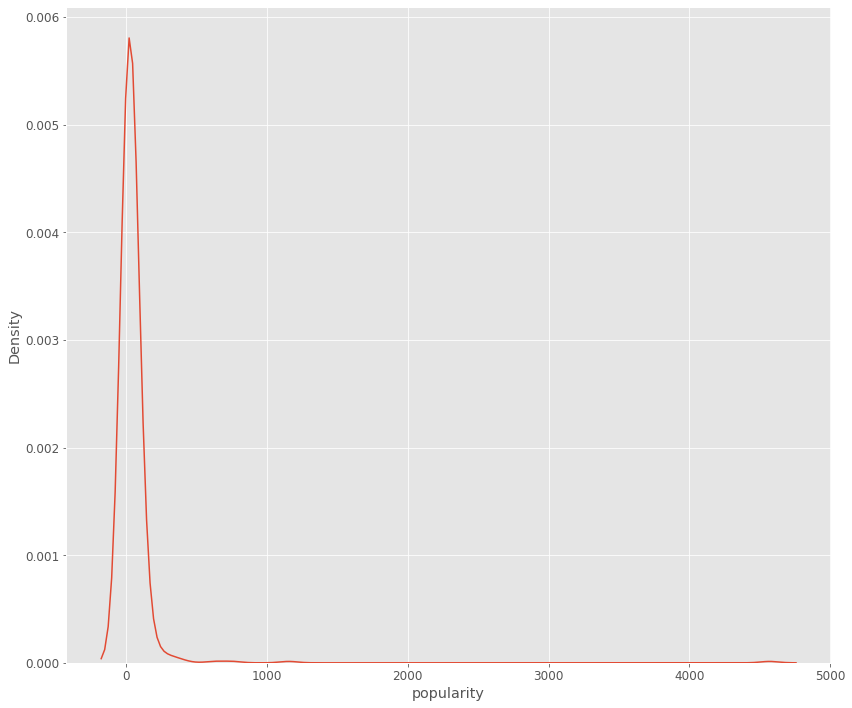

In [15]:
plotkde(data=df, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

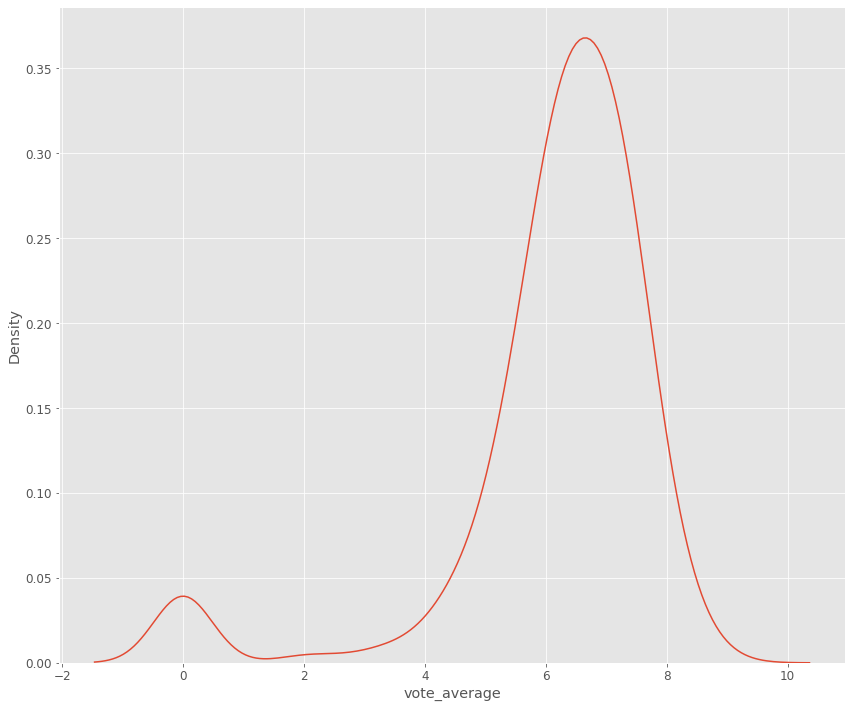

In [16]:
plotkde(data=df, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

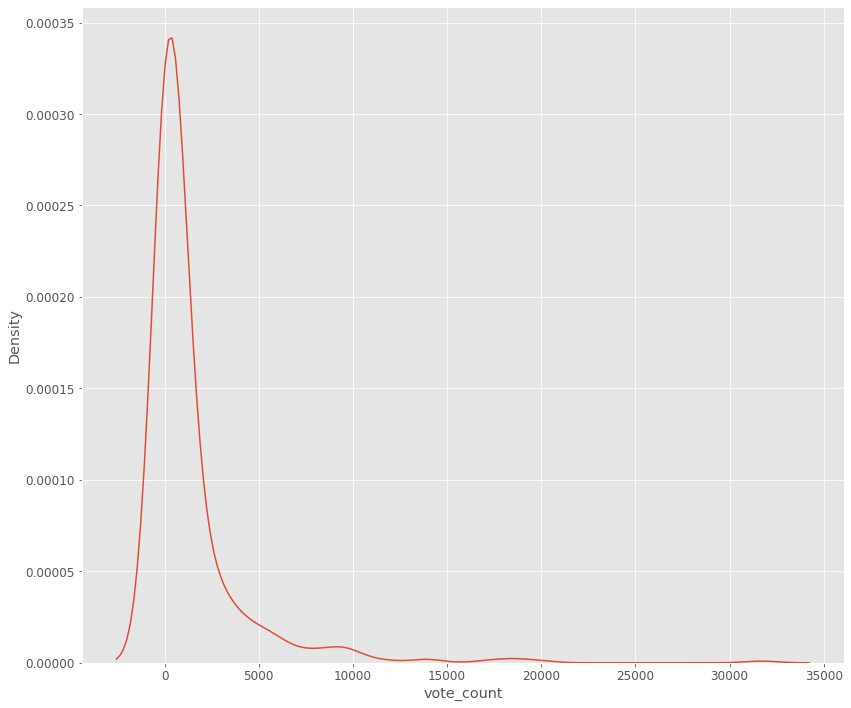

In [17]:
plotkde(data=df, x='vote_count')

# Missing Values Exploration

In [18]:
df.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          8
title                0
vote_average         0
vote_count           0
dtype: int64

<AxesSubplot:>

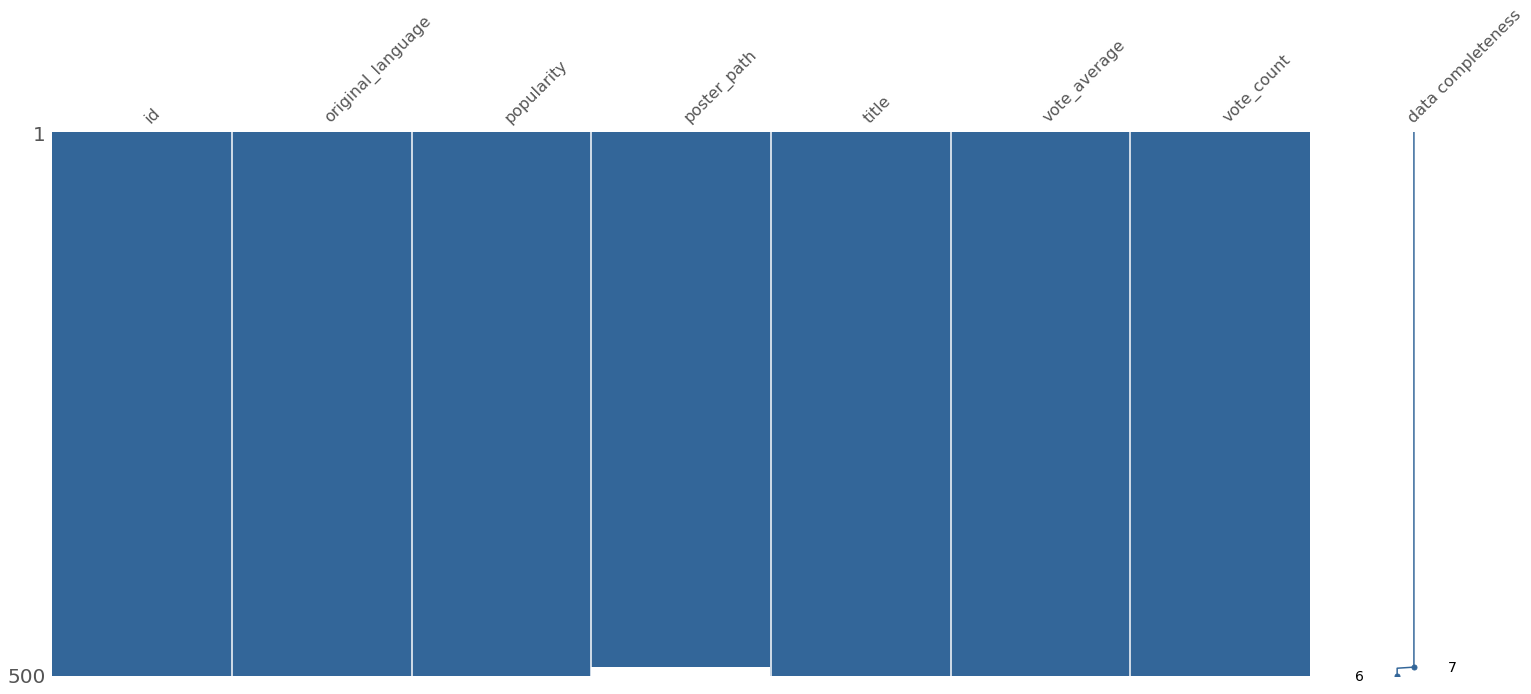

In [19]:
msno.matrix(df, labels=True, sort='descending', color=(0.2, 0.4, 0.6))

In [20]:
df.duplicated().sum()                                   # check for duplicates

0

In [21]:
df.loc[df.duplicated(subset=['id'])]                    # check where id is duplicated

,id,original_language,popularity,poster_path,title,vote_average,vote_count


[Text(0.5, 1.0, 'Count of unique original language')]

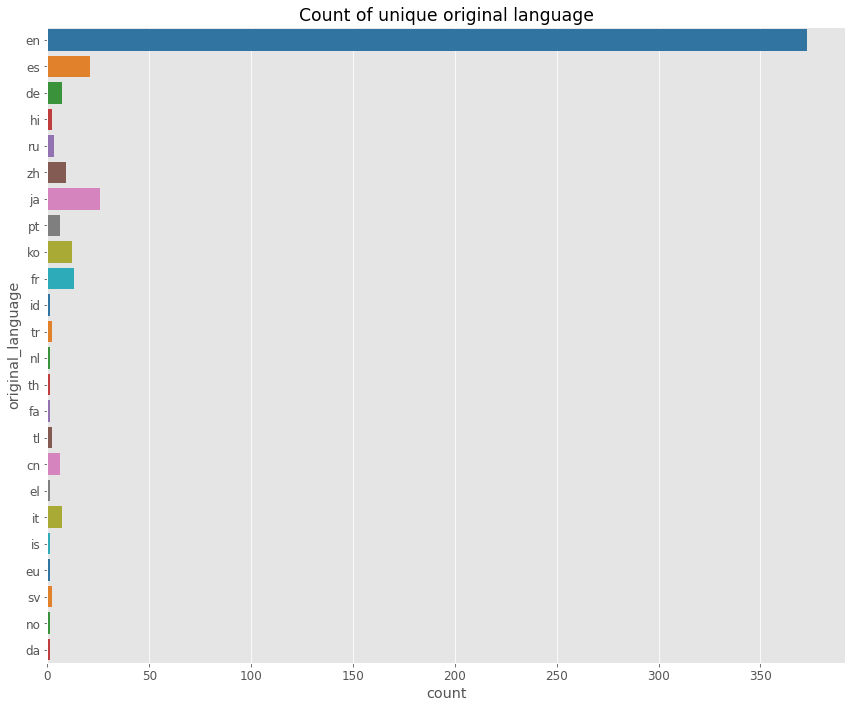

In [22]:
ax = sns.countplot(
  data=df, 
  y='original_language', palette='tab10',
)

ax.set(title='Count of unique original language')

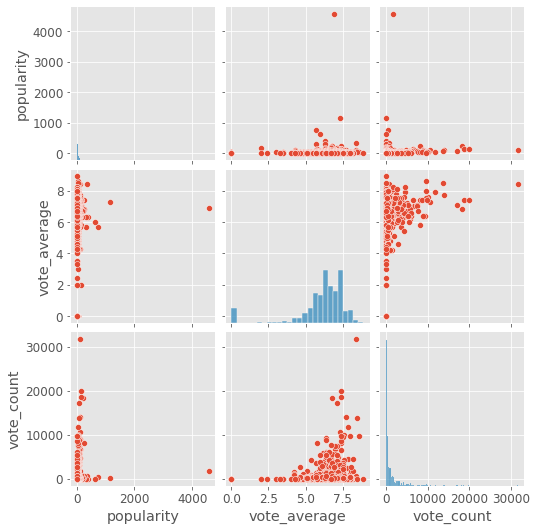

In [23]:
sns.pairplot(df)

In [24]:
df_corr = df[['popularity', 'vote_average', 'vote_count']].corr()
df_corr

,popularity,vote_average,vote_count
popularity,1.000000,0.041055,0.057516
vote_average,0.041055,1.000000,0.228081
vote_count,0.057516,0.228081,1.000000


<AxesSubplot:>

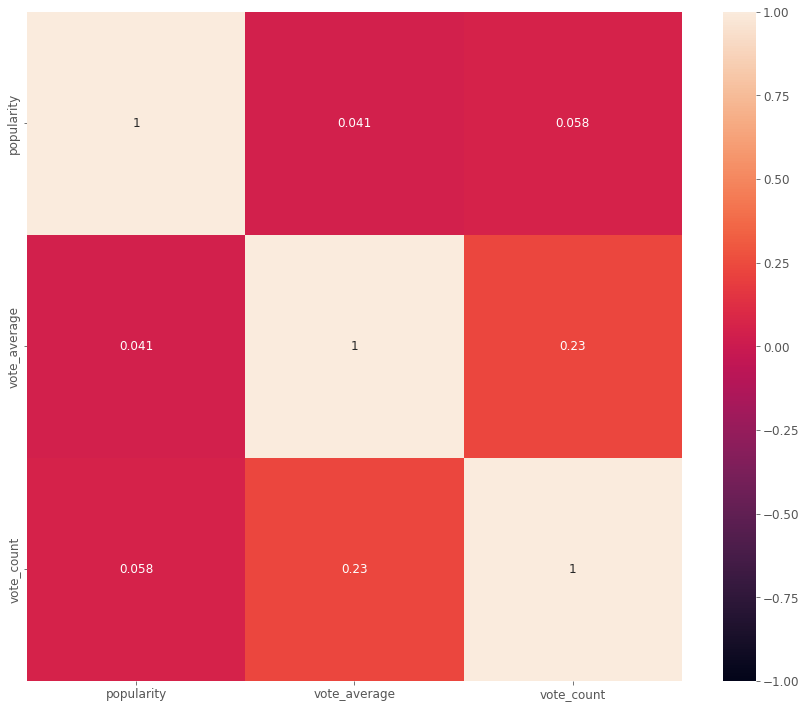

In [25]:
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)

In [26]:
from matplotlib.ticker import FuncFormatter

# set y-axis formatter
def thousand(x, pos):
  return '%1.0fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
  return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)

# Top 20 Movies by Popularity 

In [27]:
df_by_pop = df[['title', 'popularity']] \
  .groupby('title')['popularity'] \
  .agg([np.sum]) \
  .sort_values(by='sum', ascending=False) \
  .head(20)

df_by_pop

,sum
title,
Fantastic Beasts: The Secrets of Dumbledore,4570.950
Virus:32,1153.090
365 Days: This Day,751.229
The Jack in the Box: Awakening,625.929
Sneakerella,399.905
Everything Everywhere All at Once,346.632
The School of the Magical Animals,315.120
Looop Lapeta,312.587
Sonic the Hedgehog,249.113


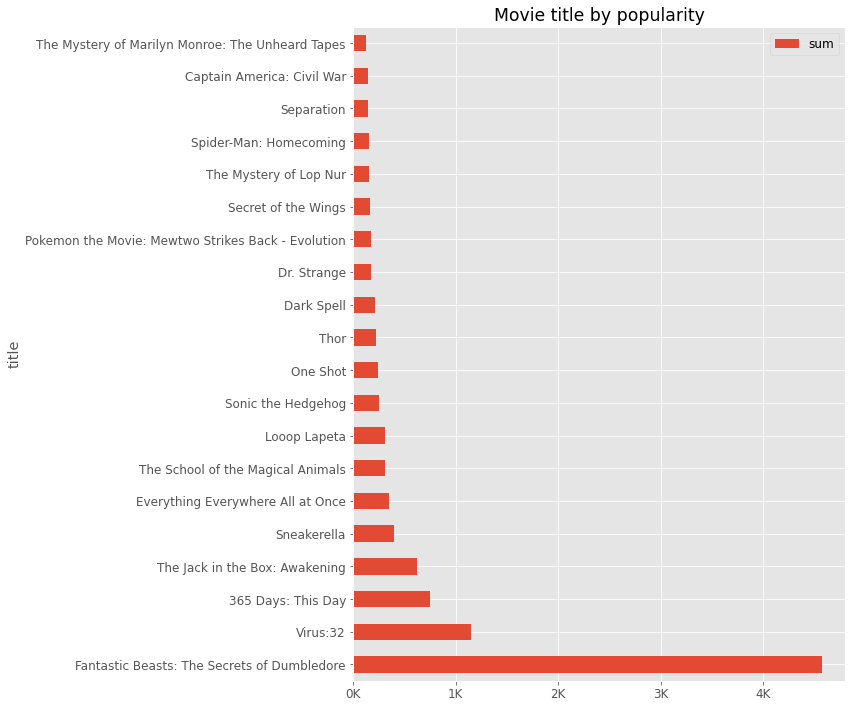

In [28]:
ax1 = df_by_pop.plot(
  kind='barh',
  grid=True,
  ylabel='title', title='Movie title by popularity'
)

ax1.xaxis.set_major_formatter(thousand)

# Top 20 Movies by Vote Count

In [29]:
df_vot_cnt = df[['title', 'vote_count']] \
  .groupby('title')['vote_count'] \
  .agg([np.sum]) \
  .sort_values(by='sum', ascending=False) \
  .head(20)

df_vot_cnt

,sum
title,
Inception,31683
Captain America: Civil War,19885
Spider-Man: Homecoming,18688
Thor,18272
Ant-Man,17148
Zootopia,14004
Parasite,13825
Kill Bill: Vol. 2,11754
Wreck-It Ralph,10685


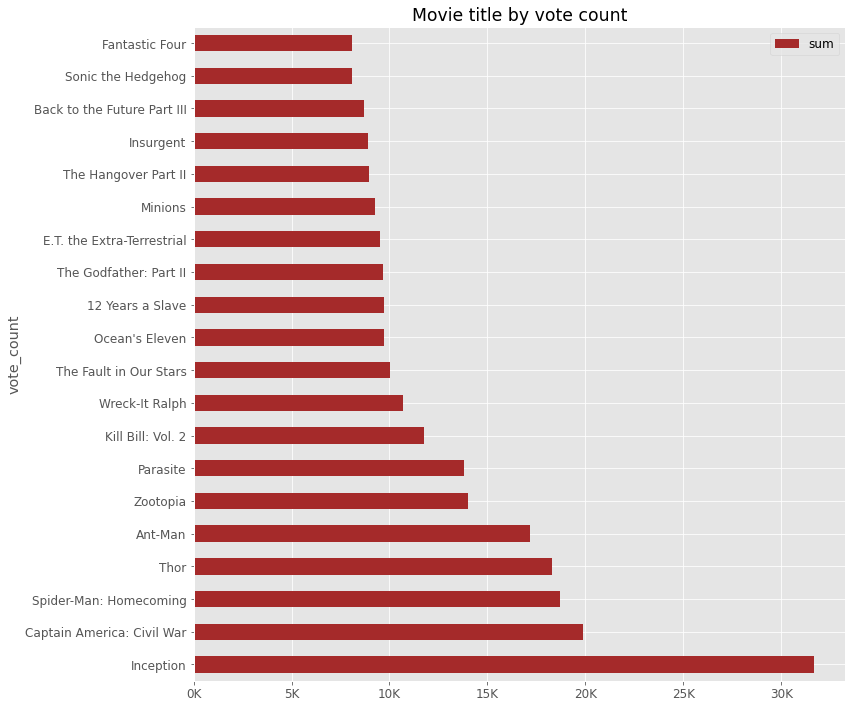

In [30]:
ax2 = df_vot_cnt.plot(
  kind='barh',
  grid=True,
  xlabel='vote_count', ylabel='title', title='Movie title by vote count',
  color='brown'
)

ax2.xaxis.set_major_formatter(thousand)

# Top 20 Movies by Vote Average

In [31]:
df_vot_avg = df[['title', 'vote_average']] \
  .groupby('title')['vote_average'] \
  .agg([np.mean]) \
  .sort_values(by='mean', ascending=False) \
  .head(20)

df_vot_avg

,mean
title,
Come and Learn with Pibby!,8.9
The Godfather: Part II,8.6
Spring Awakening: Those You've Known,8.5
Parasite,8.5
Inception,8.4
Everything Everywhere All at Once,8.4
Monica and Friends: Lessons,8.2
Vertigo,8.2
Portrait of a Lady on Fire,8.2


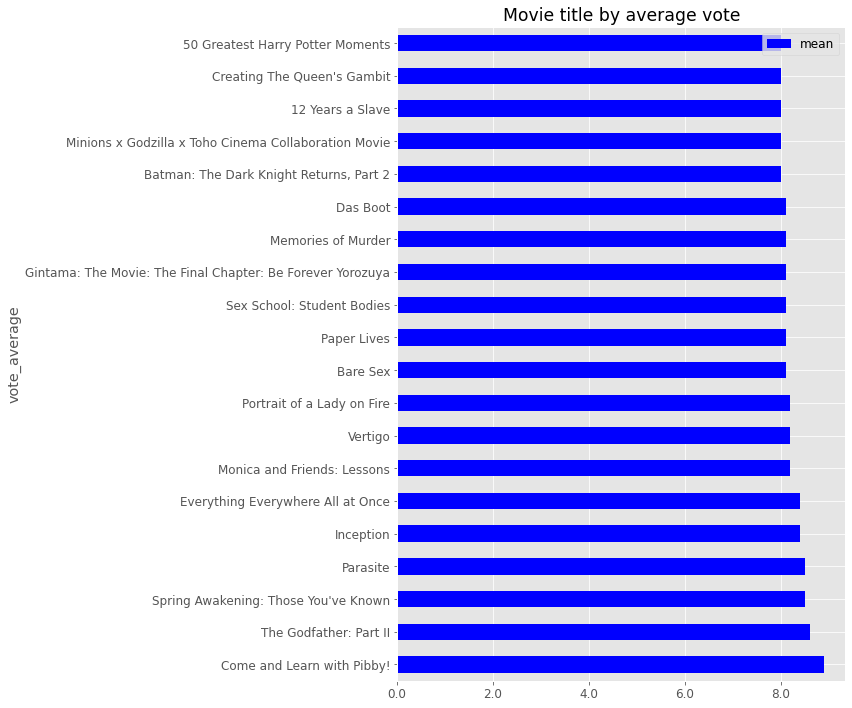

In [32]:
ax3 = df_vot_avg.plot(
  kind='barh',
  grid=True,
  xlabel='vote_average', ylabel='title', title='Movie title by average vote',
  color='blue'
)

ax3.xaxis.set_major_formatter(original)

# Movies With Release Date

In [33]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
release_date = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies[:52]:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  rel_date = release_date.append(pg['results'][0]['release_date']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [34]:
data1 = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'release_date': release_date,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df1 = pd.DataFrame(data=data1)
df1.head()

,page_number,adult,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,1,False,338953,en,4570.950,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1740
1,2,False,893370,es,1153.090,/wZiF79hbhLK1U2Pj9bF67NAKXQR.jpg,2022-04-21,Virus:32,7.3,78
2,3,False,829557,en,751.229,/7qU0SOVcQ8BTJLodcAlulUAG16C.jpg,2022-04-27,365 Days: This Day,5.7,511
3,4,False,801071,en,625.929,/3Ib8vlWTrAKRrTWUrTrZPOMW4jp.jpg,2022-02-24,The Jack in the Box: Awakening,6.0,51
4,5,False,756187,en,399.905,/jJ07f8DTdeWnCKCwDzB4htLXKBN.jpg,2022-05-11,Sneakerella,6.3,44


In [35]:
# drop page number and adult columns
df1.drop(columns=['page_number', 'adult'], inplace=True)
df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,338953,en,4570.950,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1740
1,893370,es,1153.090,/wZiF79hbhLK1U2Pj9bF67NAKXQR.jpg,2022-04-21,Virus:32,7.3,78
2,829557,en,751.229,/7qU0SOVcQ8BTJLodcAlulUAG16C.jpg,2022-04-27,365 Days: This Day,5.7,511
3,801071,en,625.929,/3Ib8vlWTrAKRrTWUrTrZPOMW4jp.jpg,2022-02-24,The Jack in the Box: Awakening,6.0,51
4,756187,en,399.905,/jJ07f8DTdeWnCKCwDzB4htLXKBN.jpg,2022-05-11,Sneakerella,6.3,44


In [36]:
df1.shape

(52, 8)

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 52 non-null     int64  
 1   original_language  52 non-null     object 
 2   popularity         52 non-null     float64
 3   poster_path        52 non-null     object 
 4   release_date       52 non-null     object 
 5   title              52 non-null     object 
 6   vote_average       52 non-null     float64
 7   vote_count         52 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.4+ KB


In [38]:
pd.value_counts(df1.dtypes)

object     4
int64      2
float64    2
dtype: int64

In [39]:
df1['id'] = df1['id'].astype('category')                        # convert id to categorical            
df1['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 52 entries, 0 to 51
Series name: id
Non-Null Count  Dtype   
--------------  -----   
52 non-null     category
dtypes: category(1)
memory usage: 2.6 KB


In [40]:
df1['release_date'] = pd.to_datetime(df1['release_date'])       # convert release date to datetime
df1.dtypes

id                         category
original_language            object
popularity                  float64
poster_path                  object
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [41]:
df1['year'] = df1['release_date'].dt.year                       # extract year
df1['month'] = df1['release_date'].dt.month                     # extract month
df1['day'] = df1['release_date'].dt.day                         # extract day
df1['day_name'] = df1['release_date'].dt.day_name()             # extract day name
df1['week'] = df1['release_date'].dt.week                       # extract week
df1['quarter']= df1['release_date'].dt.quarter                  # extract quarter

df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,338953,en,4570.950,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1740,2022,4,6,Wednesday,14,2
1,893370,es,1153.090,/wZiF79hbhLK1U2Pj9bF67NAKXQR.jpg,2022-04-21,Virus:32,7.3,78,2022,4,21,Thursday,16,2
2,829557,en,751.229,/7qU0SOVcQ8BTJLodcAlulUAG16C.jpg,2022-04-27,365 Days: This Day,5.7,511,2022,4,27,Wednesday,17,2
3,801071,en,625.929,/3Ib8vlWTrAKRrTWUrTrZPOMW4jp.jpg,2022-02-24,The Jack in the Box: Awakening,6.0,51,2022,2,24,Thursday,8,1
4,756187,en,399.905,/jJ07f8DTdeWnCKCwDzB4htLXKBN.jpg,2022-05-11,Sneakerella,6.3,44,2022,5,11,Wednesday,19,2


In [42]:
df1.describe(exclude='number')

,id,original_language,poster_path,release_date,title,day_name
count,52.0,52,52,52,52,52
unique,52.0,11,52,50,52,7
top,35.0,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-27 00:00:00,Fantastic Beasts: The Secrets of Dumbledore,Friday
freq,1.0,33,1,2,1,17
first,NaN,NaN,NaN,1978-09-06 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2022-05-11 00:00:00,NaN,NaN


In [43]:
df1.drop(columns=['year', 'month', 'day',	'week', 'quarter']).describe(include='number')

,popularity,vote_average,vote_count
count,52.000000,52.000000,52.000000
mean,261.433596,6.611538,4181.115385
std,638.619015,1.022426,6730.464307
min,63.621000,2.000000,1.000000
25%,82.076750,6.300000,59.750000
50%,112.360500,6.700000,508.500000
75%,174.154750,7.225000,6121.750000
max,4570.950000,8.400000,31683.000000


<AxesSubplot:xlabel='popularity', ylabel='Density'>

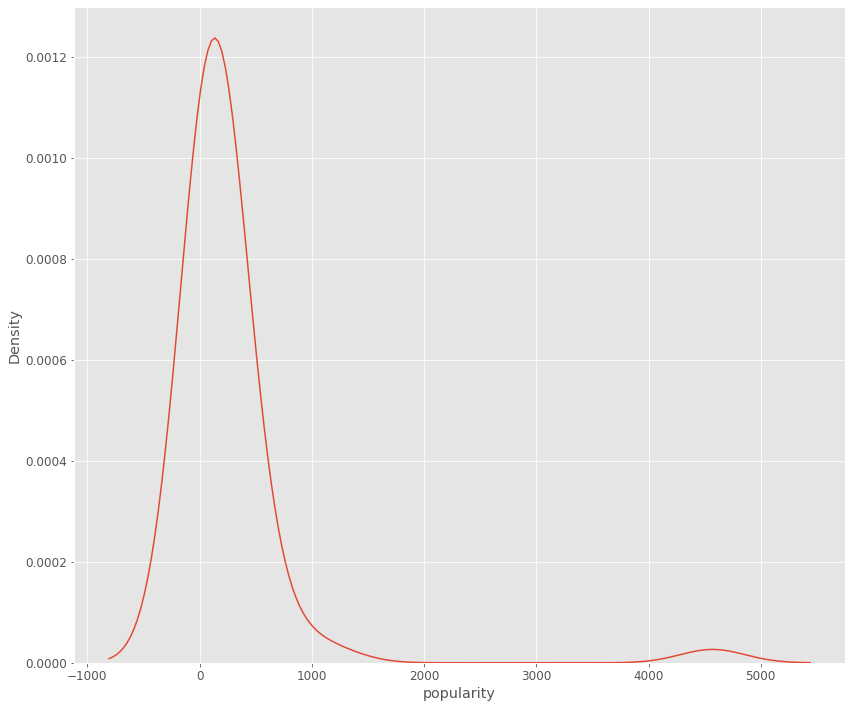

In [44]:
plotkde(data=df1, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

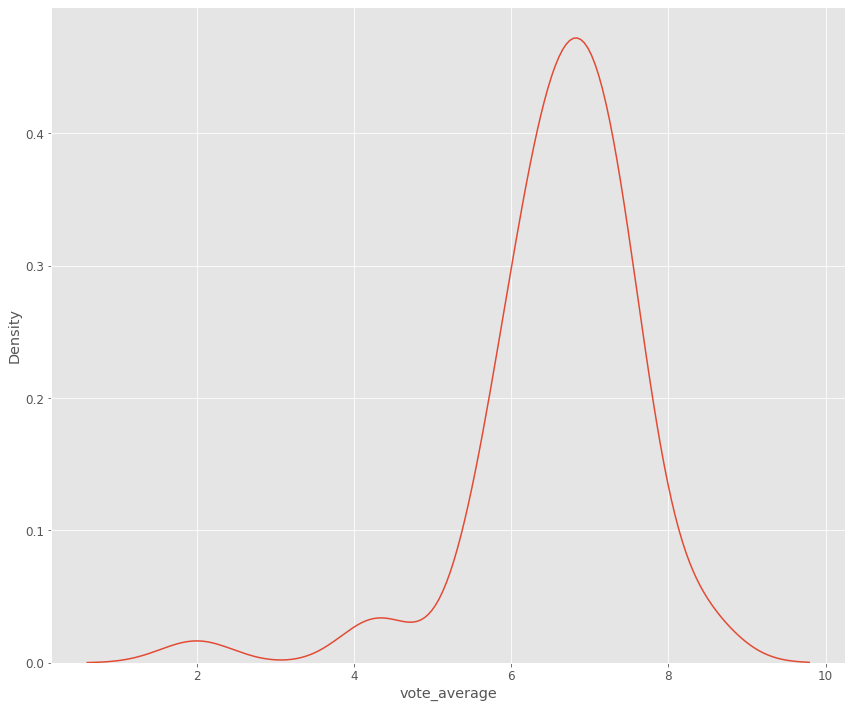

In [45]:
plotkde(data=df1, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

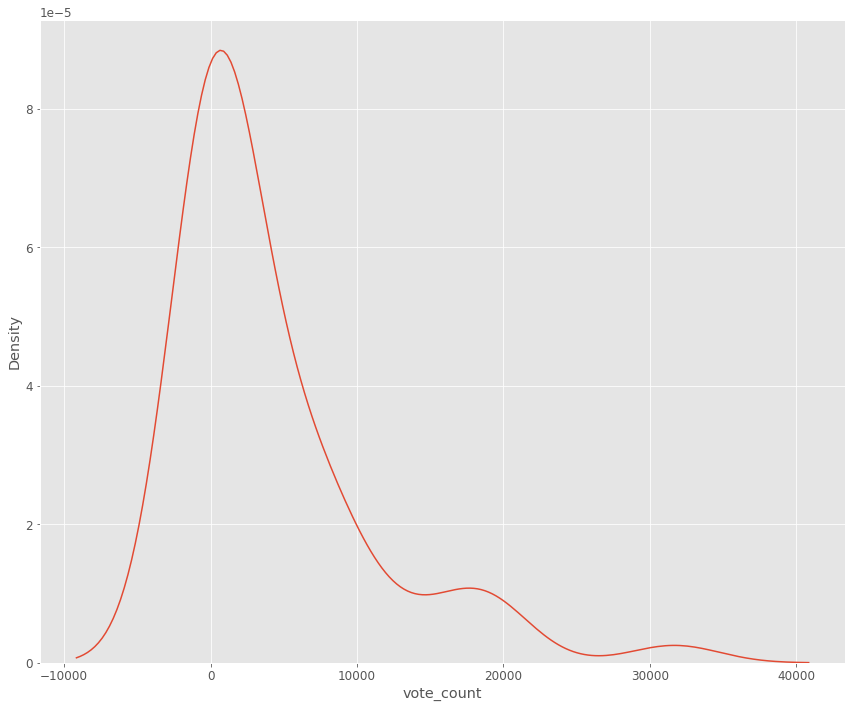

In [46]:
plotkde(data=df1, x='vote_count')

# Missing Values Exploration

In [47]:
df1.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          0
release_date         0
title                0
vote_average         0
vote_count           0
year                 0
month                0
day                  0
day_name             0
week                 0
quarter              0
dtype: int64

<AxesSubplot:>

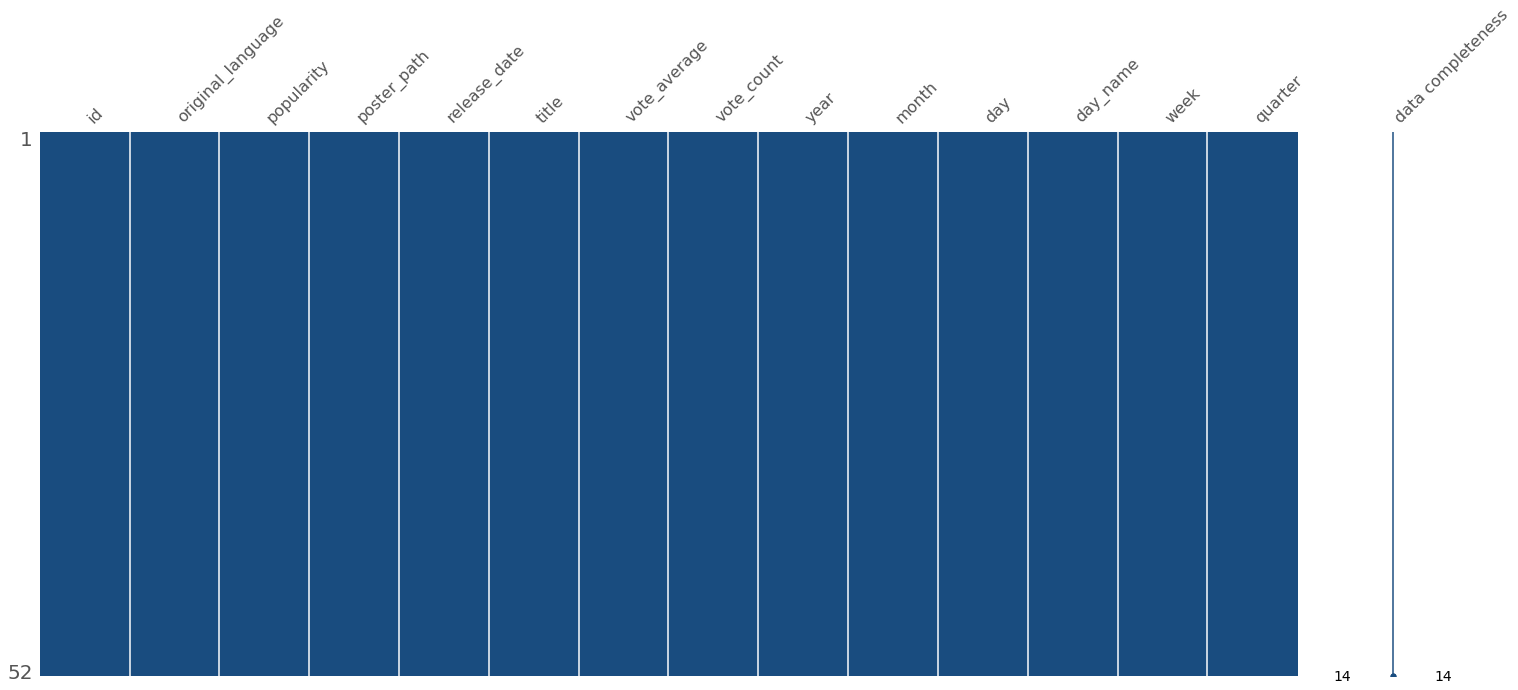

In [48]:
msno.matrix(df1, labels=True, sort='descending', color=(0.1, 0.3, 0.5))

In [49]:
df1.duplicated().sum()                                # check for duplicates

0

In [50]:
df1.loc[df.duplicated(subset=['id'])]                 # check where id is duplicated

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter


[Text(0.5, 1.0, 'Count of unique original language')]

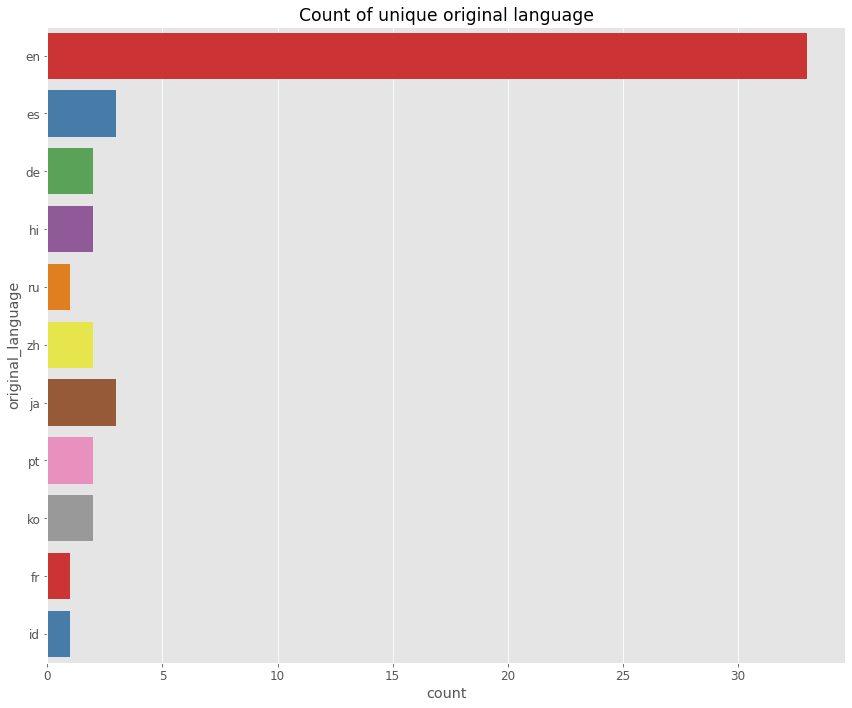

In [51]:
ax4 = sns.countplot(
  data=df1,
  y='original_language', palette='Set1',
)

ax4.set(title='Count of unique original language')

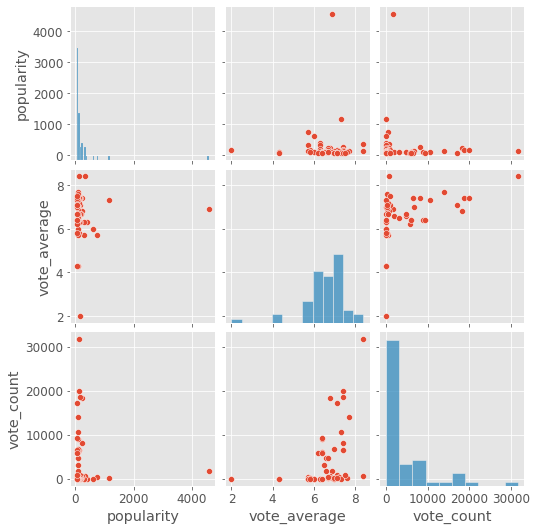

In [52]:
sns.pairplot(df1[['popularity', 'vote_average', 'vote_count']])

In [53]:
df_corr1 = df1[['popularity', 'vote_average', 'vote_count']].corr()
df_corr1

,popularity,vote_average,vote_count
popularity,1.000000,0.036482,-0.096119
vote_average,0.036482,1.000000,0.385425
vote_count,-0.096119,0.385425,1.000000


<AxesSubplot:>

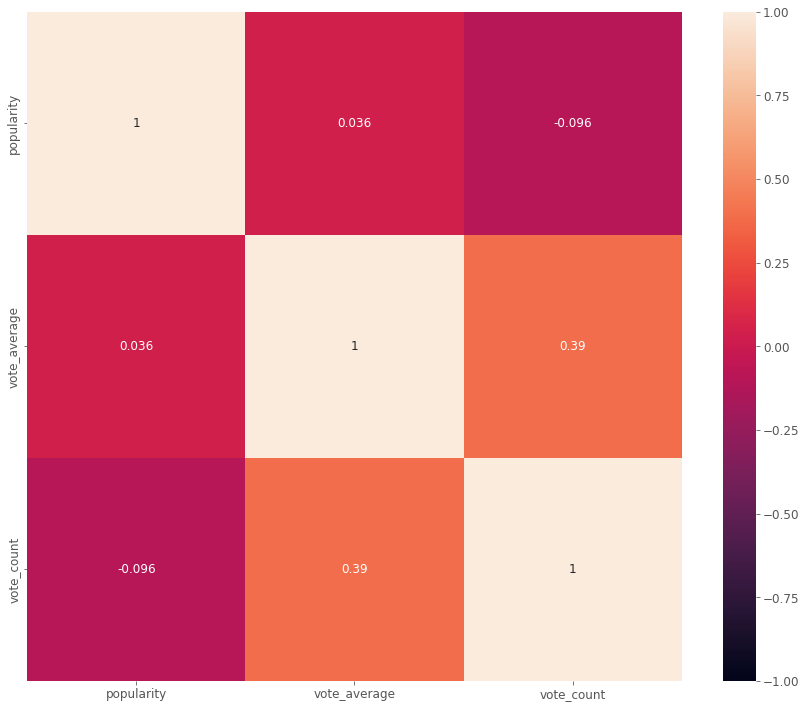

In [54]:
sns.heatmap(df_corr1, annot=True, vmin=-1, vmax=1)